<a href="https://colab.research.google.com/github/FarrasNayan321/ML/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Header for csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FarrasNayan321/UTS/main/dataset')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df = df.rename(columns={'charges': 'charges (nominal premi asuransi)'}) #saya ubah sperti pada soal
df

,age,sex,bmi,children,smoker,region,charges (nominal premi asuransi)
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Checking Null Data

In [4]:
df.isnull().sum()

age                                 0
sex                                 0
bmi                                 2
children                            0
smoker                              2
region                              0
charges (nominal premi asuransi)    0
dtype: int64

# Filling Null data

In [5]:
mean = df['bmi'].mean()

df['bmi'] = df['bmi'].fillna(mean)

df['bmi'].isnull().sum()

0

In [6]:
modus = df['smoker'].mode()[0]

df['smoker'] = df['smoker'].fillna(modus)

df['smoker'].isnull().sum()

0

In [7]:
df.isnull().sum()

# data disini sudah full semua

age                                 0
sex                                 0
bmi                                 0
children                            0
smoker                              0
region                              0
charges (nominal premi asuransi)    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               1338 non-null   int64  
 1   sex                               1338 non-null   object 
 2   bmi                               1338 non-null   float64
 3   children                          1338 non-null   int64  
 4   smoker                            1338 non-null   object 
 5   region                            1338 non-null   object 
 6   charges (nominal premi asuransi)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age')

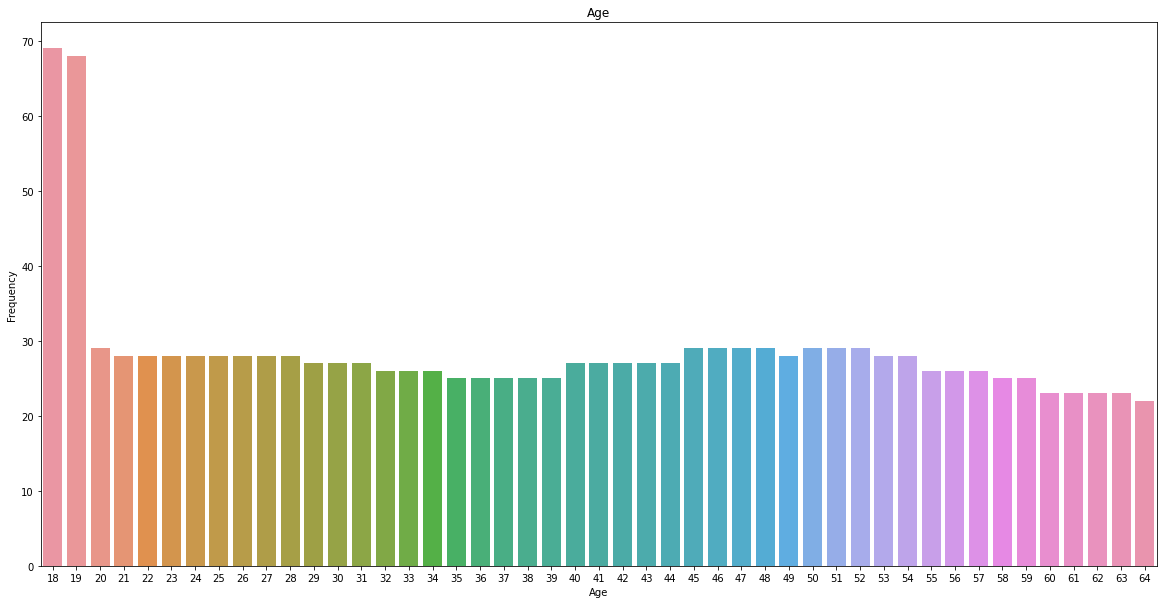

In [66]:
plt.figure(figsize=(20, 10))

sns.countplot(df['age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age")


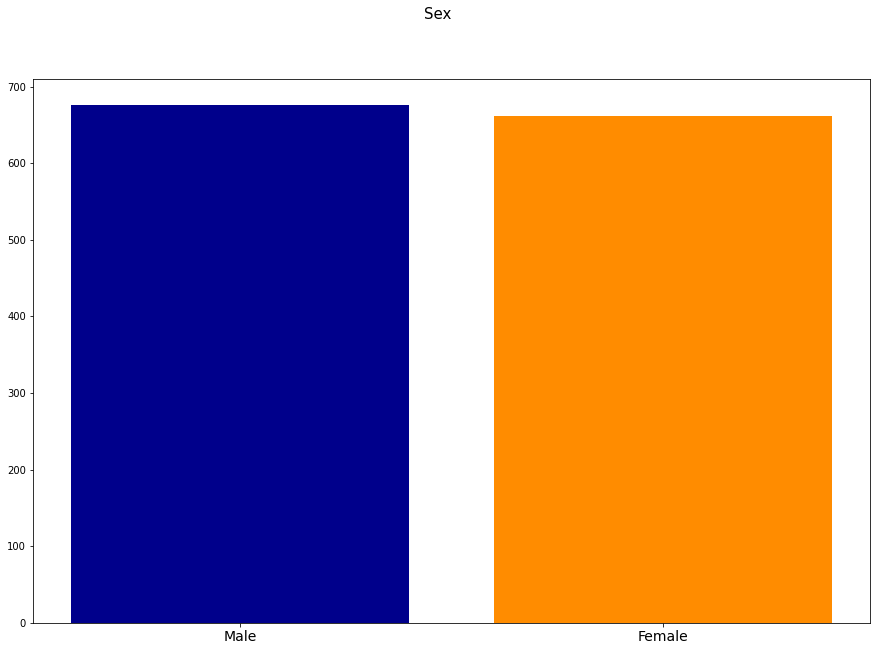

In [65]:
fig, ax = plt.subplots(1, figsize=(15,10))
plt.suptitle('Sex', fontsize=15)
ax.bar(df['sex'].value_counts().index, 
       df['sex'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Male','Female'], fontsize = 14);

Text(0.5, 1.0, 'Bmi')

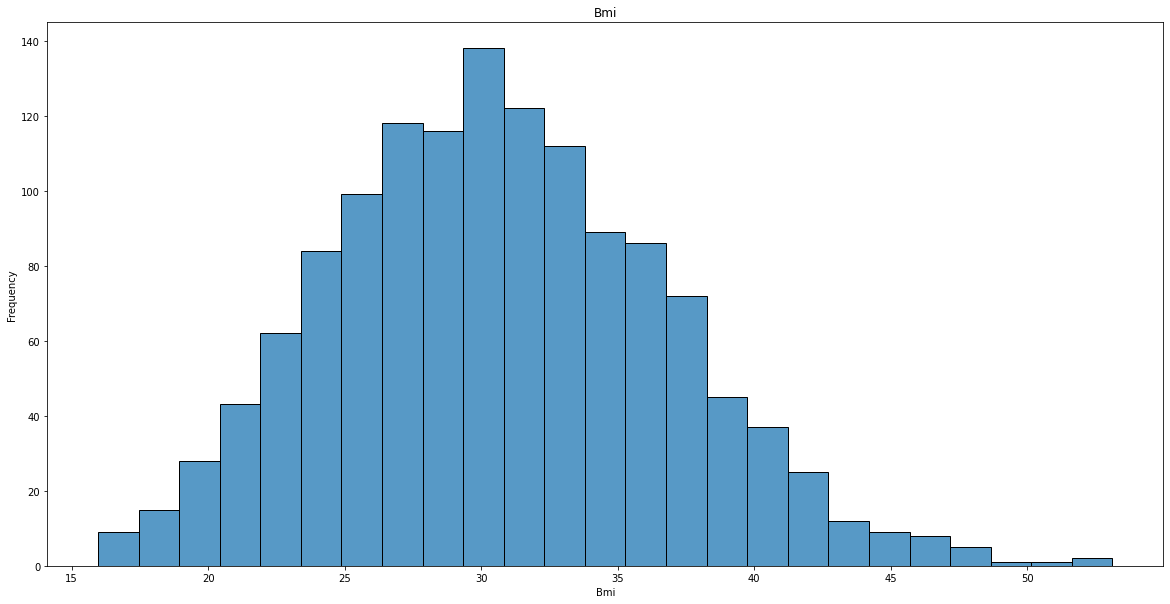

In [77]:
plt.figure(figsize=(20, 10))

sns.histplot(df['bmi'])
plt.xlabel("Bmi")
plt.ylabel("Frequency")
plt.title("Bmi")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Children')

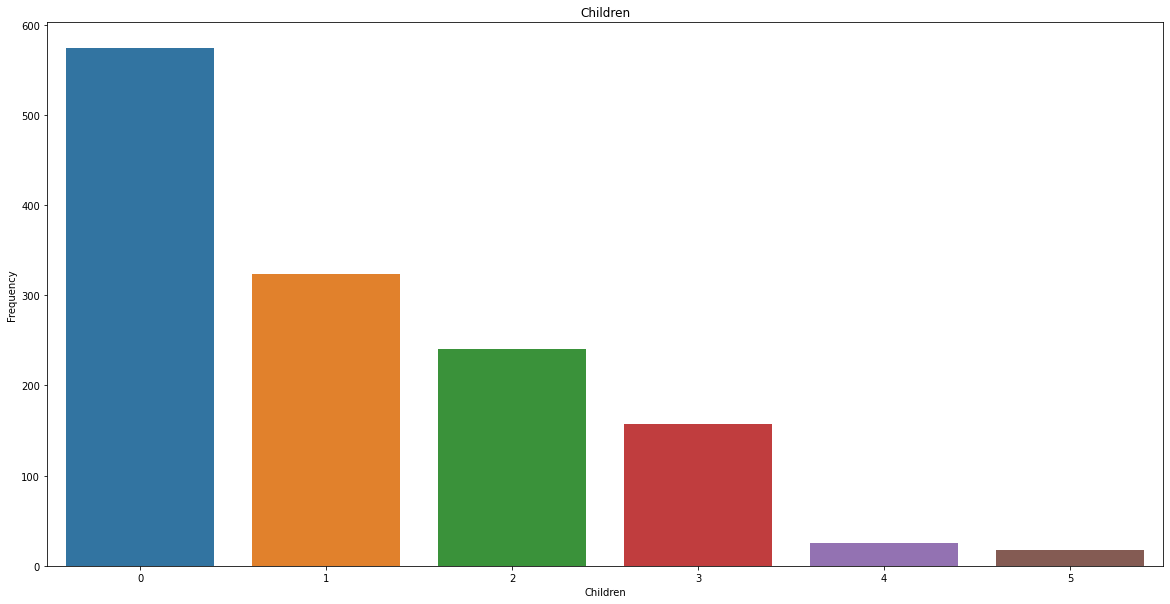

In [78]:
plt.figure(figsize=(20, 10))

sns.countplot(df['children'])
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.title("Children")

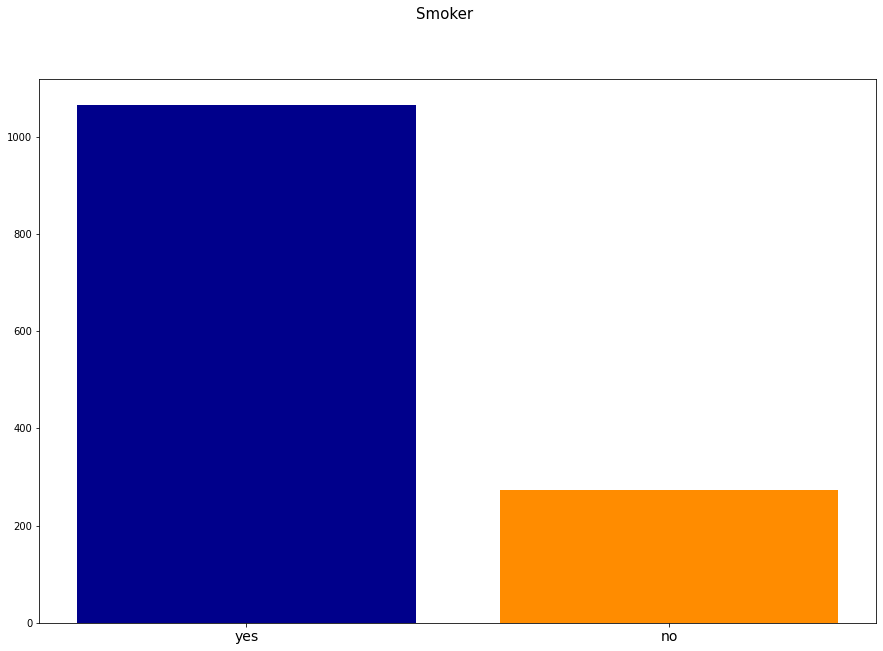

In [67]:
fig, ax = plt.subplots(1, figsize=(15,10))
plt.suptitle('Smoker', fontsize=15)
ax.bar(df['smoker'].value_counts().index, 
       df['smoker'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['yes','no'], fontsize = 14);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Region')

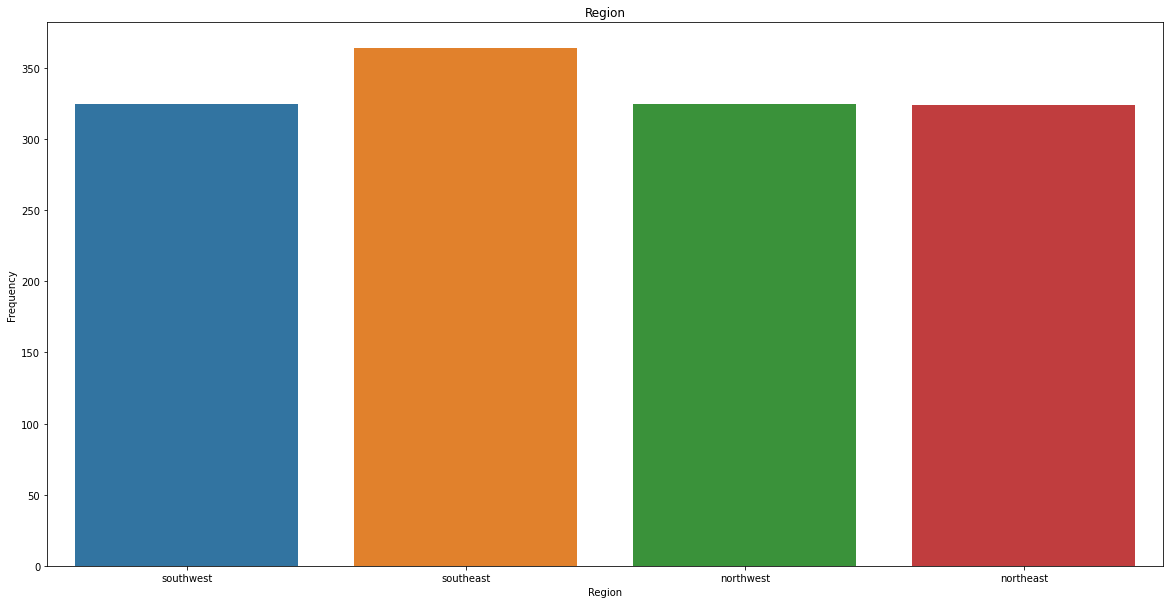

In [70]:
plt.figure(figsize=(20, 10))

sns.countplot(df['region'])
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Region")

Text(0.5, 1.0, 'Charge')

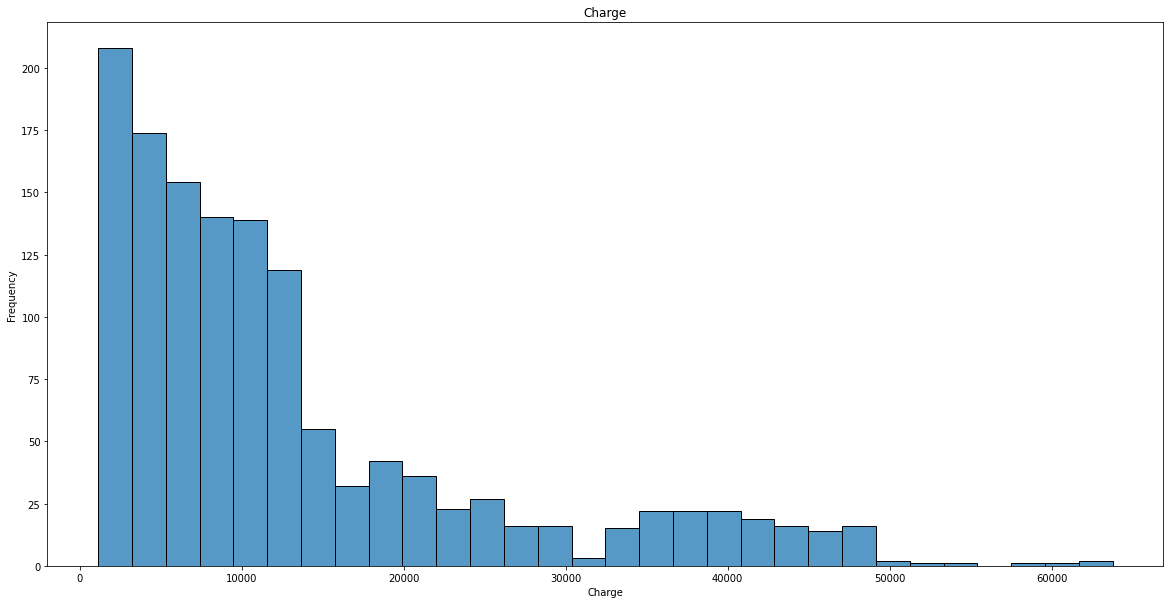

In [75]:
plt.figure(figsize=(20, 10))

sns.histplot(df['charges (nominal premi asuransi)'])
plt.xlabel("Charge")
plt.ylabel("Frequency")
plt.title("Charge")

# Graphic Correlation

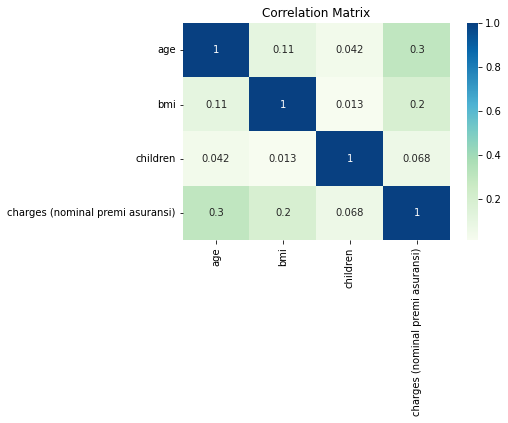

In [10]:
sns.heatmap(data=df.corr(), annot=True, cmap = "GnBu")
plt.title("Correlation Matrix")
plt.show()

# Kerena korelasi tertinggi ada di age jadi saya drop sisanya

In [11]:
df_new = df.drop(['bmi', 'children'], axis=1)
df_new.head()

,age,sex,smoker,region,charges (nominal premi asuransi)
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520


# Ubah Region jadi One Hot Encoder

In [12]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

region = pd.DataFrame(oh_encoder.fit_transform(df[['region']]))

region.index = df['region'].index
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']

dropped_df = df_new.drop('region', axis=1)

dfn = pd.concat([dropped_df, region], axis=1)
dfn.head()

,age,sex,smoker,charges (nominal premi asuransi),northeast,northwest,southeast,southwest
0,19,female,yes,16884.92400,0.0,0.0,0.0,1.0
1,18,male,no,1725.55230,0.0,0.0,1.0,0.0
2,28,male,no,4449.46200,0.0,0.0,1.0,0.0
3,33,male,no,21984.47061,0.0,1.0,0.0,0.0
4,32,male,no,3866.85520,0.0,1.0,0.0,0.0


In [13]:
seCounter = dfn[dfn['southeast'] == 1]['southeast'].count()
swCounter = dfn[dfn['southwest'] == 1]['southwest'].count()
neCounter = dfn[dfn['northeast'] == 1]['northeast'].count()
nwCounter = dfn[dfn['northwest'] == 1]['northwest'].count()

print('Southeast =', seCounter)
print('Southwest =', swCounter)
print('Northeast =', neCounter)
print('Northwest =', nwCounter)

Southeast = 364
Southwest = 325
Northeast = 324
Northwest = 325


In [14]:
dfn = dfn.drop(['southwest','northwest','sex', 'smoker'], axis=1)
dfn.head()

,age,charges (nominal premi asuransi),northeast,southeast
0,19,16884.92400,0.0,0.0
1,18,1725.55230,0.0,1.0
2,28,4449.46200,0.0,1.0
3,33,21984.47061,0.0,0.0
4,32,3866.85520,0.0,0.0


In [15]:
sc = StandardScaler()
x = dfn.drop('charges (nominal premi asuransi)',axis=1)
x_transformed = sc.fit_transform(x)
y = dfn['charges (nominal premi asuransi)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train

,age,northeast,southeast
560,46,0.0,0.0
1285,47,1.0,0.0
1142,52,0.0,1.0
969,39,0.0,1.0
486,54,0.0,0.0
...,...,...,...
1095,18,1.0,0.0
1130,39,0.0,1.0
1294,58,1.0,0.0
860,37,0.0,0.0


# Linear Regression

In [16]:
def MSE_count(y, y_predicted):
    length = len(y)
    sum_value = 0
    for i in range(length):
        sum_value += (y[i] - y_predicted[i])**2
    return sum_value/length

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_iters = self.n_iters
        loss = []

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw =  ( 2 * np.dot(X.T, (y_predicted - y))) / n_samples
            db = ( 2 * np.sum(y_predicted - y)) / n_samples
            loss.append(MSE_count(y, y_predicted))
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
        plt.plot(np.arange(1, n_iters), loss[1:])
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        
        return self.weights, self.bias
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [17]:
LR = LinearRegression(lr=0.001, n_iters=1500)

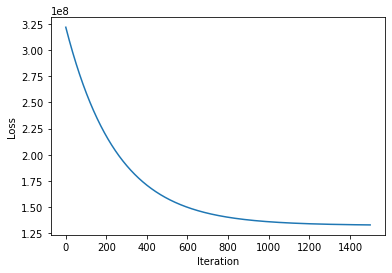

In [18]:
weights,bias = LR.fit(x_transformed,y)

weights = {'Features':[['age'],['northeast'],['northwest']], 'Weights':weights}  

weight_list = pd.DataFrame(weights)

In [19]:
print("Bias = ", bias)

Bias =  12611.708599478065


In [20]:
weight_list

,Features,Weights
0,[age],3448.620715
1,[northeast],341.058658
2,[northwest],971.476064


# Evaluation with MAE, MSE, RMSE, dan R2.

In [22]:
y_pred = LR.predict(x_transformed)
y_compare = {'y_original': df['charges (nominal premi asuransi)'], 'y_predict': y_pred} 
compare = pd.DataFrame(y_compare)
compare

,y_original,y_predict
0,16884.92400,6863.280894
1,1725.55230,8800.756669
2,4449.46200,11256.215665
3,21984.47061,10300.923488
4,3866.85520,10055.377589
...,...,...
1333,10600.54830,14475.203781
1334,2205.98080,7413.882814
1335,1629.83350,8800.756669
1336,2007.94500,7354.372694


In [27]:
print('MAE: ',mean_absolute_error(y, y_pred))
print('MSE: ',mean_squared_error(y, y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y, y_pred)))
print('R-Squared: ',r2_score(y, y_pred))

MAE:  8693.788670747159
MSE:  132870543.66684963
RMSE:  11526.948584376076
R-Squared:  0.09329851724411287


### MAE:  8693.788670747159
### MSE:  132870543.66684963
### RMSE:  11526.948584376076
### R-Squared:  0.09329851724411287

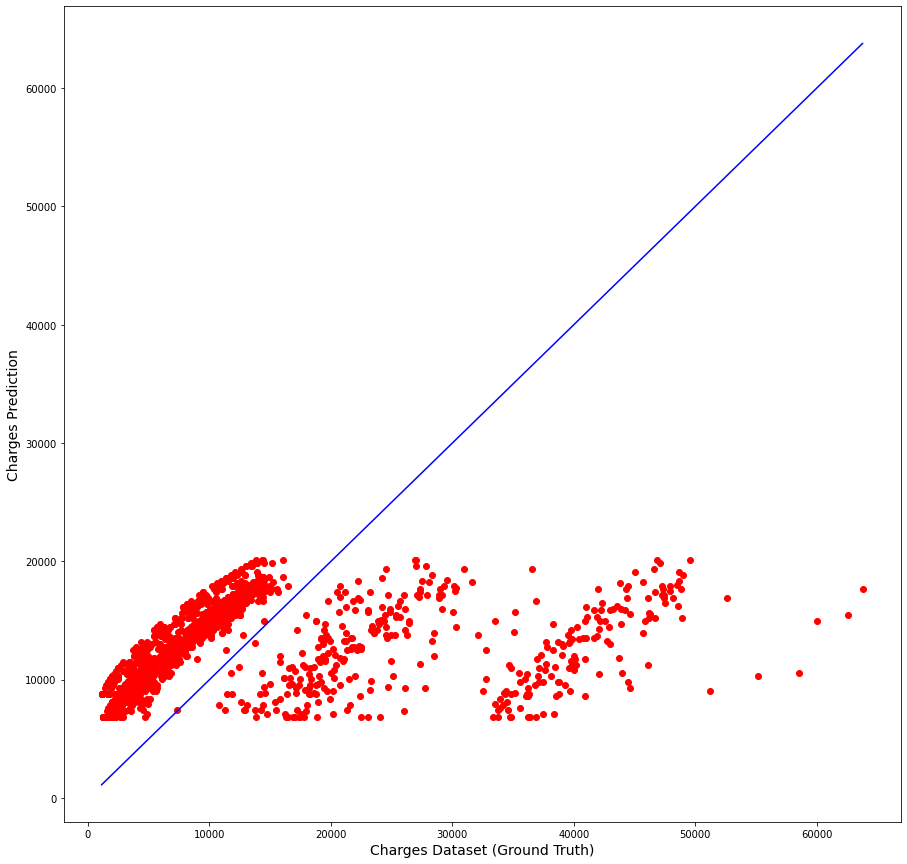

In [31]:
plt.figure(figsize=(15, 15))
plt.scatter(y, y_pred, c='red')

p1 = max(max(y), max(y_pred))
p2 = min(min(y), min(y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Charges Dataset (Ground Truth)', fontsize=14)
plt.ylabel('Charges Prediction', fontsize=14)
plt.show()